In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
from scipy.fft import fft, fftfreq
from scipy.signal import chirp, find_peaks, peak_widths

In [2]:
e1_data = pd.read_csv("../lab_data/lab2/lab2_day4/exp1_fourier.csv", header=None)

# EXP 1

In [3]:
e1_data

,0,1,2
0,-35.3462,-0.000093,-0.000114
1,-35.3438,0.000066,-0.000060
2,-35.3413,-0.000048,-0.000149
3,-35.3389,-0.000028,0.000037
4,-35.3365,0.000052,-0.000042
...,...,...,...
32763,44.7980,0.000033,0.000045
32764,44.8005,-0.000011,-0.000030
32765,44.8029,-0.000078,-0.000067
32766,44.8053,-0.000054,0.000063


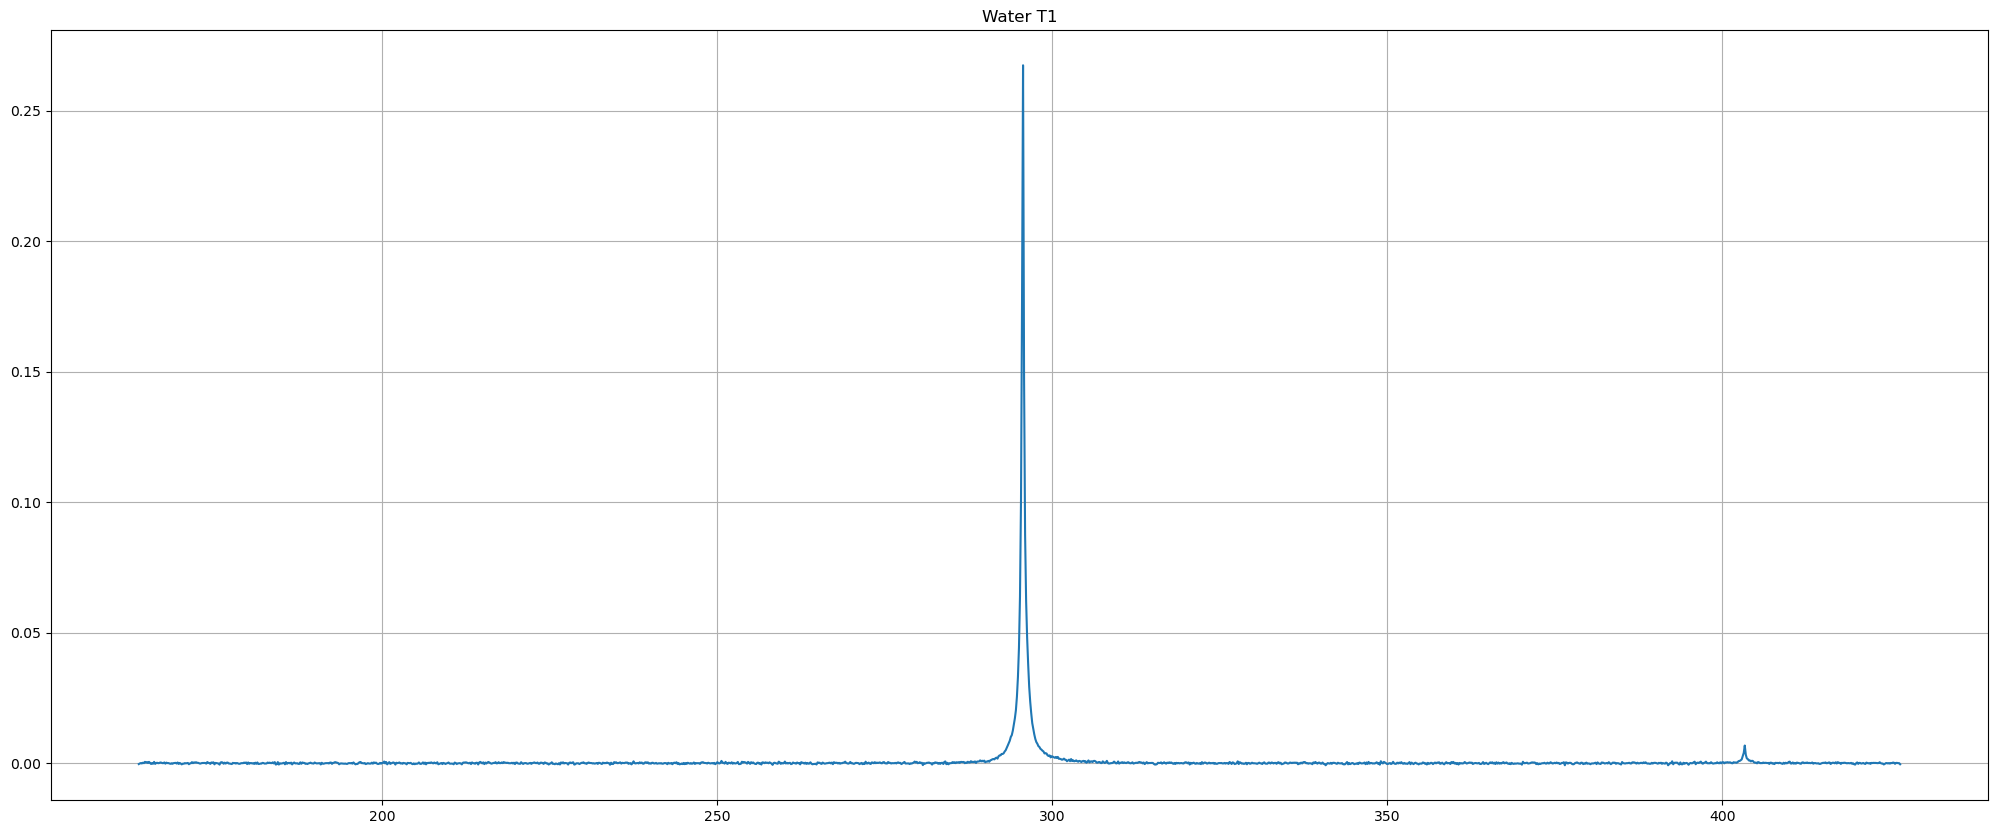

In [4]:
xs = np.array(e1_data.iloc[:,0])*62.37445 # divide by 1000 to convert to seconds
ys = np.array(e1_data.iloc[:,1])

frac1 = 1.9
frac2 = 1.9

#xsp = xs[int(len(xs)/frac):len(xs) - int(len(xs)/frac) -1]
#ysp = ys[int(len(ys)/frac):len(ys) - int(len(ys)/frac) -1]

xsp = xs[len(xs)-int(len(xs)/frac1):int(len(xs)/frac2)]
ysp = ys[len(ys)-int(len(ys)/frac1):int(len(ys)/frac2)]

fig,ax = plt.subplots(1, figsize=(25,10))

ax.plot(xsp, ysp)
#ax.plot(xs, ys, alpha=0.2)
ax.set_title("Water T1")
ax.grid()


In [5]:
# define the fitting function
def lorentzian(x, m, a, Omega, c):
    return m*(a/((x-Omega)**2 + a*a)) + c

[6.23741704e-02 2.52631928e-01 2.95596966e+02 2.24341107e-04]
7.916655715033402
[[ 8.78428302e-08  3.51608395e-07  3.71408448e-09 -1.04610376e-09]
 [ 3.51608395e-07  2.81716396e-06  3.77087800e-08 -4.17957618e-09]
 [ 3.71408448e-09  3.77087800e-08  1.45897746e-06 -4.62481474e-11]
 [-1.04610376e-09 -4.17957618e-09 -4.62481474e-11  1.04612133e-09]]


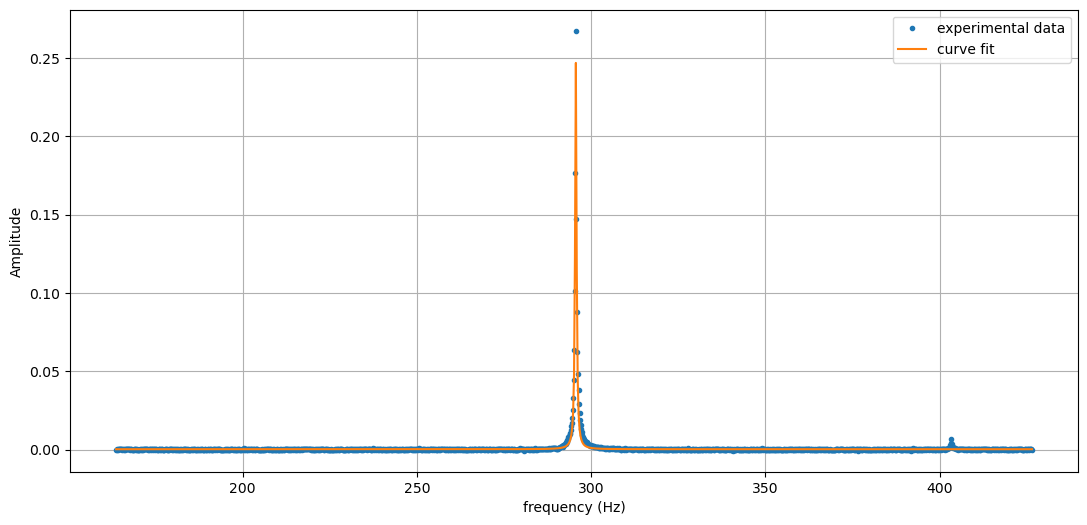

In [6]:
# perform the fit
# Your code goes here, the results should be similar to the following plot

initial_guess = [1/200,0.02*62.37445,4.74*62.37445,0]

popt, pcov = scipy.optimize.curve_fit(lorentzian, xsp, ysp, initial_guess)
print(popt)

x_val = np.arange(min(xsp), max(xsp), (max(xsp)- min(xsp))/1000)

fig,ax = plt.subplots(1, figsize=(13,6))
ax.plot(xsp, ysp, '.',  label="experimental data")
ax.plot(x_val, lorentzian(x_val, *popt), label="curve fit")
ax.set_xlabel("frequency (Hz)")
ax.set_ylabel("Amplitude")
ax.grid()
print(2/(popt[1]))
ax.legend()
print(pcov)

In [7]:
j_coupling = (8.2-4.8)*62.37445
print(j_coupling)

212.07312999999996


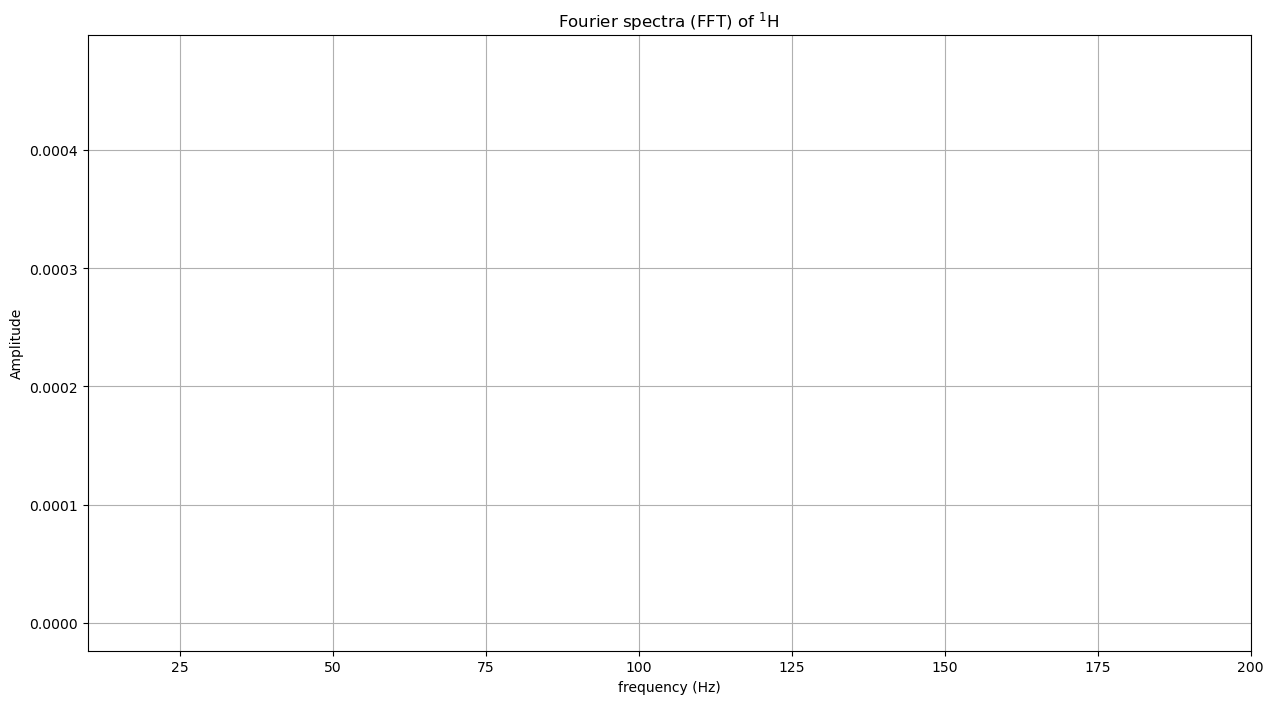

In [8]:
# Number of sample points
N = len(xs)
# sample spacing
T = xs[1]-xs[0]
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(ys)
xf = fftfreq(N, T)[:N//2]

frac = 3



xfp = xf[0:int(len(xf)/frac)]
yfp = yf[0:int(len(yf)/frac)]

fig, ax = plt.subplots(1, figsize=(15,8))
ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
ax.set_xlim((10,200))
ax.set_title("Fourier spectra (FFT) of $^1$H")
ax.set_xlabel("frequency (Hz)")
ax.set_ylabel("Amplitude")
#ax.plot(xf,[0.020]*len(xf))


ax.grid(which='both')



# EXP 2

In [9]:
T1_H=pd.read_csv("../lab_data/lab2/lab2_day1/lab2_exp2_t1_data.csv", header=None)
T1_H

,0,1
0,0.001000,-0.133098
1,0.264105,-0.104555
2,0.527211,-0.082435
3,0.790316,-0.061412
4,1.053420,-0.042217
5,1.316530,-0.025082
6,1.579630,-0.011842
7,1.842740,0.002790
8,2.105840,0.016413
9,2.368950,0.028820


In [10]:
# define the fitting function
def growExp(x, T1, m, x_offset, c):
    return m * (1- 2* np.exp(-(x-x_offset) /T1)) + c 

Text(0.5, 1.0, 'CHCl$_3$ T1')

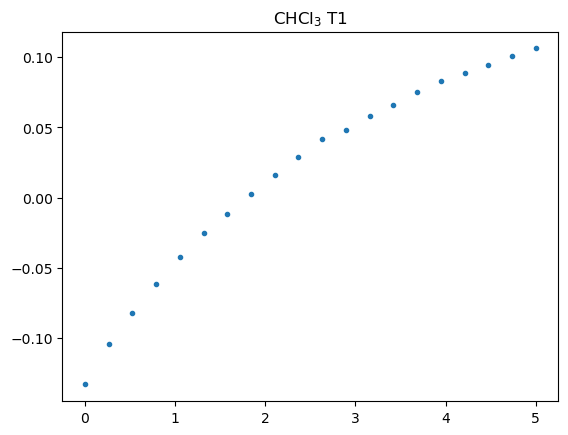

In [11]:
xs = np.array(T1_H.iloc[:,0]) 
ys = np.array(T1_H.iloc[:,1])


fig, ax = plt.subplots(1)
ax.plot(xs, ys, '.')
ax.set_title("CHCl$_3$ T1")



[ 2.93822462  0.81290043 -5.08472636 -0.65534261] [[ 3.69260193e-03  3.00204098e+01 -1.08513709e+02 -3.00202425e+01]
 [ 3.00206466e+01 -8.13279637e+08  2.93959516e+09  8.13279638e+08]
 [-1.08514565e+02  2.93959516e+09 -1.06251519e+10 -2.93959517e+09]
 [-3.00204793e+01  8.13279638e+08 -2.93959517e+09 -8.13279640e+08]]


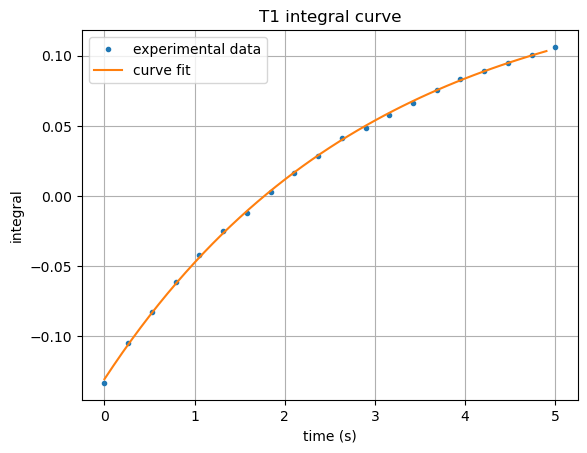

In [12]:
# perform the fit
# Your code goes here, the results should be similar to the following plot

initial_guess = [10,1,0,0]

popt, pcov = scipy.optimize.curve_fit(growExp, xs, ys, initial_guess)
print(popt, pcov)

x_val = np.arange(min(xs), max(xs), 0.1)
plt.plot(xs, ys, '.', label="experimental data")
plt.plot(x_val, growExp(x_val, *popt), label="curve fit")
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("integral")
plt.title("T1 integral curve")
plt.legend()


# EXP 3

In [13]:
exp4_frequency_data = pd.read_csv("../lab_data/lab2/lab2_day1/lab2_exp3_data_frequency.csv", header=None)

exp4_frequency_data

,0,1,2
0,-82.3715,-0.000099,-1.581150e-04
1,-82.2937,-0.000064,-5.012080e-05
2,-82.2159,-0.000127,2.115560e-07
3,-82.1381,-0.000118,1.001900e-04
4,-82.0603,0.000055,-1.720050e-05
...,...,...,...
4091,235.9820,-0.000004,-2.773290e-05
4092,236.0600,0.000012,-5.557730e-05
4093,236.1380,0.000018,-2.558370e-05
4094,236.2160,-0.000071,-1.192170e-04


In [14]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):     
    import numpy as np
    from math import factorial
    
    
    window_size = np.abs(np.int(window_size))
    order = np.abs(np.int(order))
    
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

/tmp/ipykernel_15008/1908727484.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))
/tmp/ipykernel_15008/1908727484.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

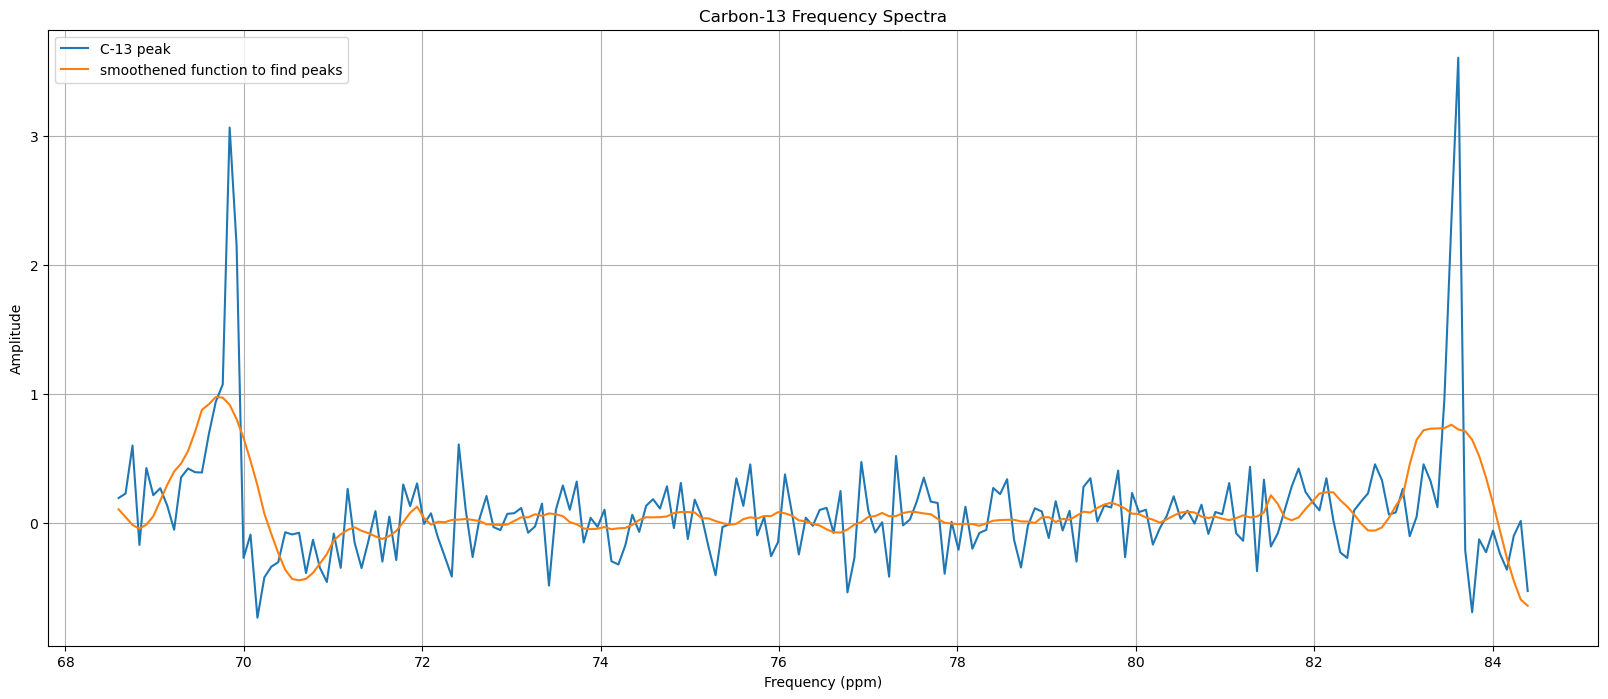

In [15]:
xs = np.array(exp4_frequency_data.iloc[:,0]) # divide by 1000 to convert to seconds
ys = np.array(exp4_frequency_data.iloc[:,1])

frac = 1

#xsp = xs[int(len(xs)/frac):len(xs) - int(len(xs)/frac) -1]
#ysp = ys[int(len(ys)/frac):len(ys) - int(len(ys)/frac) -1]

xsp = xs[0:int(len(xs)/frac)]
ysp = ys[0:int(len(ys)/frac)]

fig,ax = plt.subplots(1, figsize=(20,8))

#ax.plot(xsp, ysp)
#ax.plot(xs, ys, alpha=0.2)
ax.set_title("Carbon-13 Frequency Spectra")
#ax.set_xlim((68,85))
ax.grid()
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")




frac1 = 1.9
frac2 = 1.91

xspp = xs[int(len(xs) - len(xs)/frac1):int(len(xs)/frac2)]
yspp = ys[int(len(ys) - len(ys)/frac1):int(len(ys)/frac2)]*1000
yhat = savitzky_golay(yspp, 57, 10)
ax.plot(xspp, yspp, label="C-13 peak")
ax.plot(xspp, yhat, label="smoothened function to find peaks")

#ax.plot(xspp, [max(yspp)/2]*len(xspp), label="Half max")
ax.legend()

In [16]:
def local_max(input_list:list):
    out = []
    pre = 0
    prepre = 0
    for i in range(0,len(input_list)):
        if input_list[i] <= pre and pre >= prepre and i >0:
            out.append(i-1)
        prepre = pre
        pre = input_list[i]
    return out

[0, 14, 34, 43, 46, 50, 60, 62, 70, 76, 81, 91, 93, 95, 110, 114, 122, 129, 134, 136, 139, 143, 154, 158, 162, 166, 175, 192]
[68.5956 69.6851 71.2415 71.9418 72.1753 72.4865 73.2647 73.4204 74.0429
 74.5098 74.8989 75.6771 75.8327 75.9884 77.1556 77.4669 78.0895 78.6342
 79.0233 79.1789 79.4124 79.7236 80.5796 80.8909 81.2022 81.5135 82.2138
 83.5367]


Text(0, 0.5, 'Amplitude $\\times 10^3$')

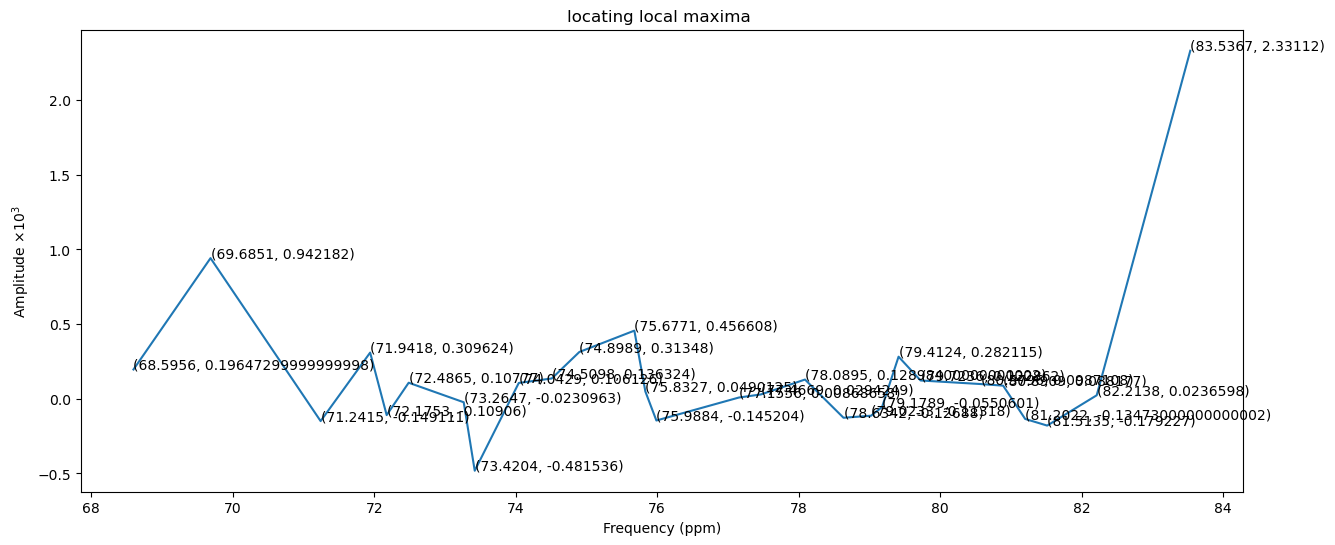

In [17]:
maxima = local_max(yhat)
print(maxima)
print(xspp[maxima])
fig, ax = plt.subplots(1, figsize=(15,6))
ax.plot(xspp[maxima],yspp[maxima])
for x,y in zip(xspp[maxima],yspp[maxima]):
    ax.annotate("("+str(x) + ", "+ str(y) + ")", (x,y))

ax.set_title("locating local maxima ")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude $\\times 10^3$")

In [18]:
j_coupling = (83.6145 - 69.8407)*15.6855
print("J-coupling is : "+str(j_coupling))

J-coupling is : 216.04893990000014


In [19]:
# define the fitting function
def lorentzian(x, m, a, Omega, c):
    return m*(a/((x-Omega)**2 + a*a)) + c

[1.27398537e+01 3.31102979e-04 8.35798174e+01 6.01495397e-02]
6040.416801124568


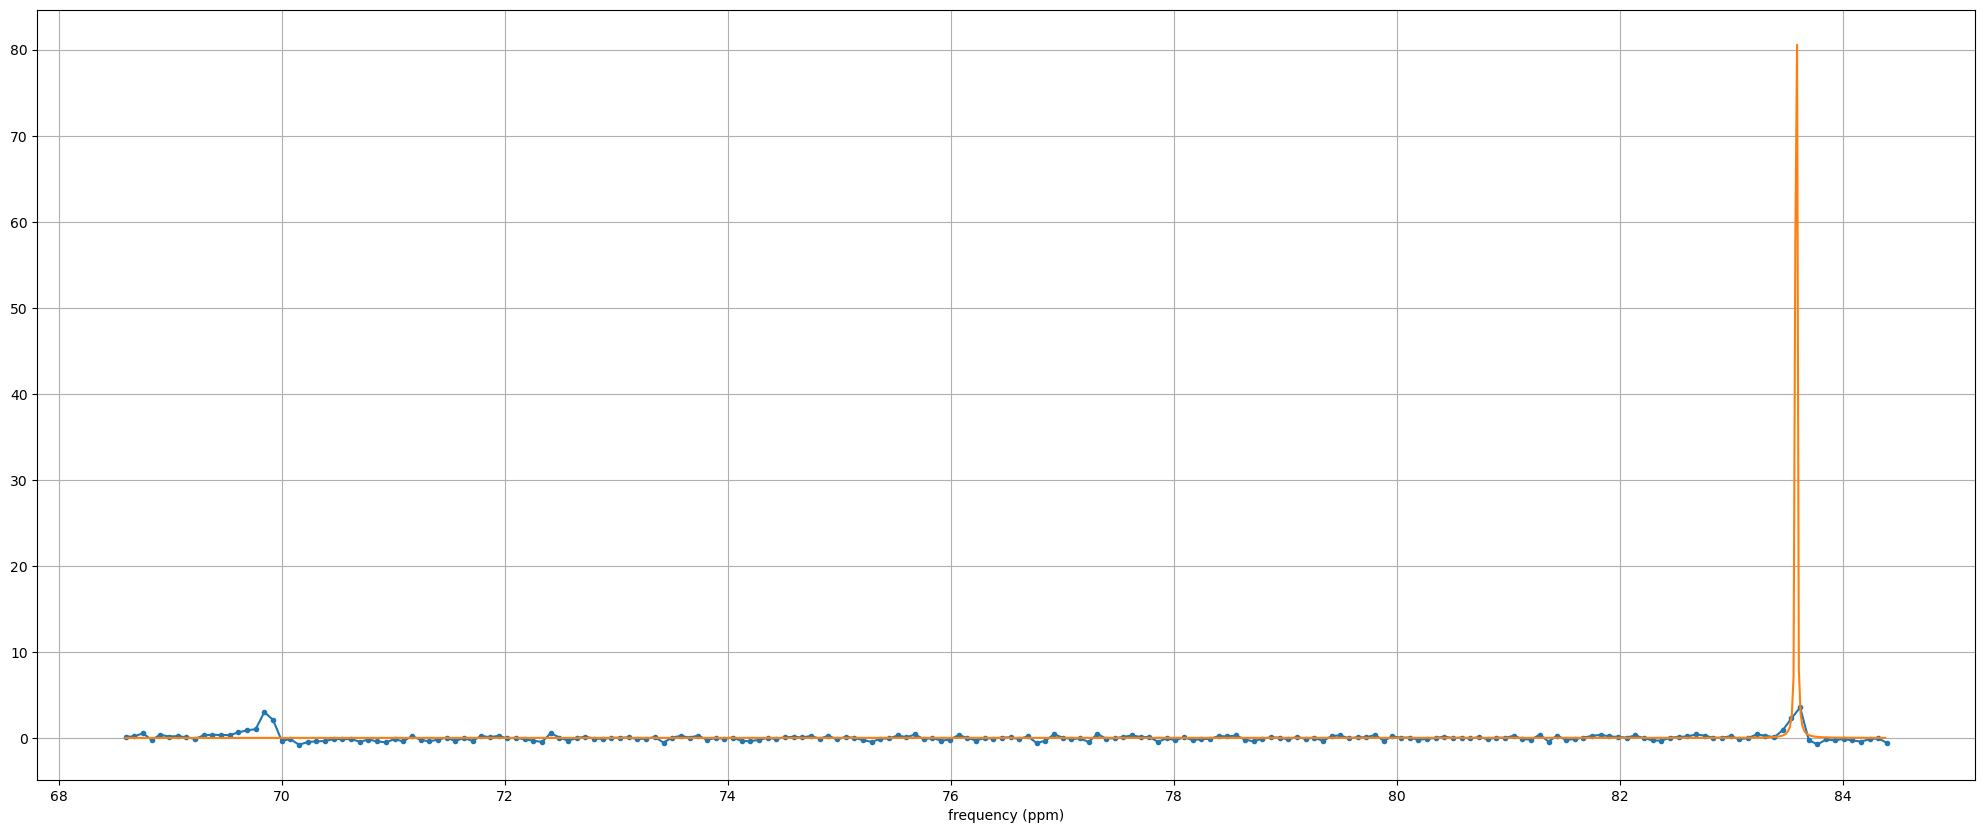

In [20]:
# perform the fit
# Your code goes here, the results should be similar to the following plot

initial_guess = [0.001,0,83.6,0]

popt, pcov = scipy.optimize.curve_fit(lorentzian, xspp, yspp, initial_guess, maxfev=50000)
print(popt)

x_val = np.arange(min(xspp), max(xspp), (max(xspp)- min(xspp))/1000)

fig,ax = plt.subplots(1, figsize=(25,10))
ax.plot(xspp, yspp, '.-')
ax.plot(x_val, lorentzian(x_val, *popt))
ax.set_xlabel("frequency (ppm)")
ax.grid()
print(2/popt[1])

# EXP 4


In [21]:
exp4_data = pd.read_csv("../lab_data/lab2/lab2_day3/exp4_zero_all/exp4_zero_all0.csv", header=None)
exp4_data

,0,1,2
0,-82.3716,-0.000558,-0.006975
1,-82.3327,-0.001923,-0.008442
2,-82.2938,-0.000040,-0.005862
3,-82.2549,-0.002034,-0.006688
4,-82.2160,-0.000777,-0.006771
...,...,...,...
8187,236.1770,-0.000546,-0.005619
8188,236.2160,0.001022,-0.005686
8189,236.2550,0.000763,-0.007351
8190,236.2940,-0.001007,-0.008873


(60.0, 90.0)

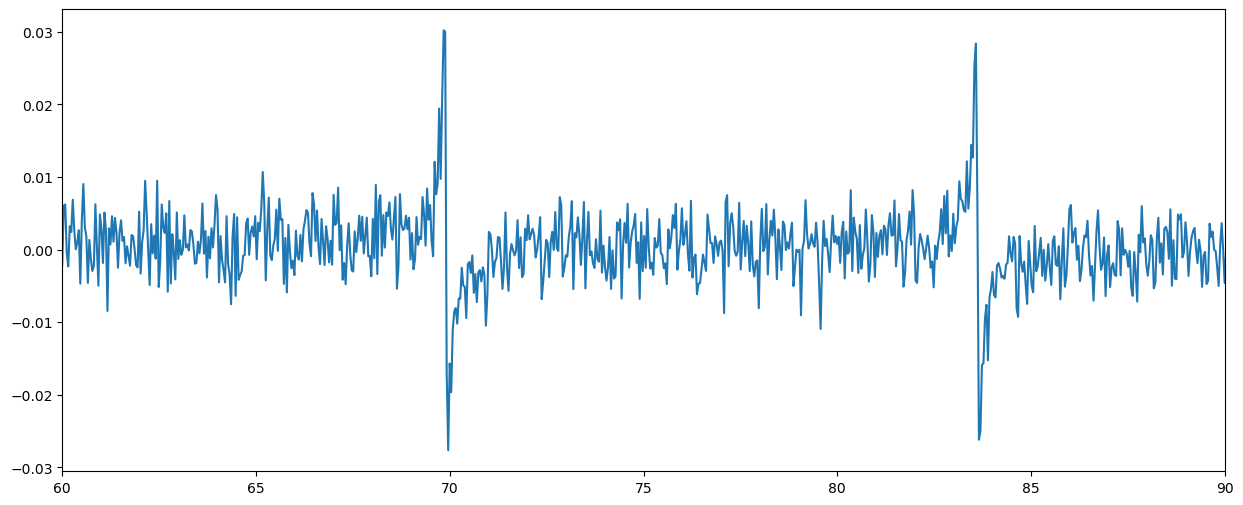

In [23]:
phi = np.pi/8
xs = np.array(exp4_data.iloc[:,0]) # divide by 1000 to convert to seconds
ys = np.array(exp4_data.iloc[:,1])*np.real(np.exp(1j*phi))

omega0 = 77
#gamma = 


fig, ax = plt.subplots(1, figsize=(15,6))
ax.plot(xs,ys)
ax.set_xlim(60,90)

# EXP 5

# EXP 6

In [24]:
T1_C=pd.read_csv("../lab_data/lab2/lab2_day3/exp6_decoupled_fourier.csv", header=None)
T1_C

,0,1
0,0.00100,-0.024016
1,4.44533,-0.016706
2,8.88967,-0.004074
3,13.33400,0.008524
4,17.77830,0.013172
5,22.22270,0.016360
6,26.66700,0.021000
7,31.11130,0.019700
8,35.55570,0.024369
9,40.00000,0.028685


Text(0.5, 1.0, 'CHCl$_3$ T1 for 13-C')

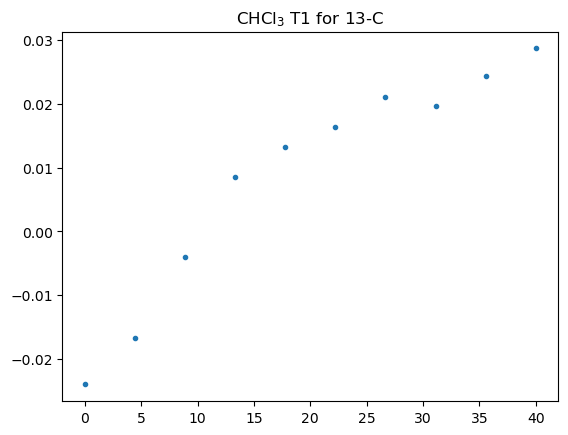

In [25]:
xs = np.array(T1_C.iloc[:,0]) 
ys = np.array(T1_C.iloc[:,1])


fig, ax = plt.subplots(1)
ax.plot(xs, ys, '.')
ax.set_title("CHCl$_3$ T1 for 13-C")



[1.76270918e+01 2.67556947e-02 1.78797440e+00 6.38405834e-03] [[ 1.37061383e+01  2.25857281e+04 -1.48696109e+07 -2.25857108e+04]
 [ 2.25857282e+04  2.70044857e+08 -1.77787629e+11 -2.70044828e+08]
 [-1.48696109e+07 -1.77787629e+11  1.17048854e+14  1.77787611e+11]
 [-2.25857109e+04 -2.70044828e+08  1.77787611e+11  2.70044800e+08]]


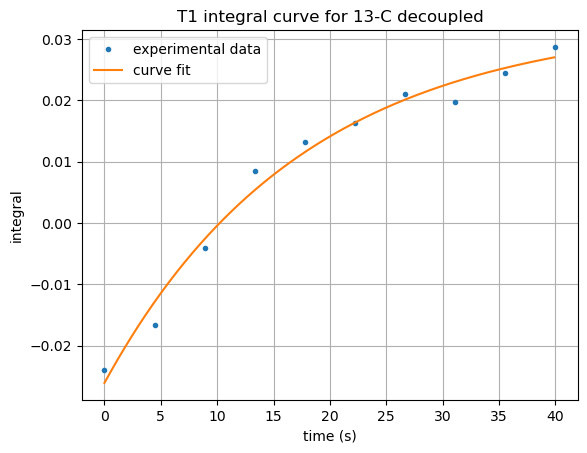

In [26]:
# perform the fit
# Your code goes here, the results should be similar to the following plot

initial_guess = [10,1,0,0]

popt, pcov = scipy.optimize.curve_fit(growExp, xs, ys, initial_guess)
print(popt, pcov)

x_val = np.arange(min(xs), max(xs), 0.1)
plt.plot(xs, ys, '.', label="experimental data")
plt.plot(x_val, growExp(x_val, *popt), label="curve fit")
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("integral")
plt.title("T1 integral curve for 13-C decoupled")
plt.legend()


In [27]:
T1_CU=pd.read_csv("../lab_data/lab2/lab2_day3/exp6_undecoupled_fourier.csv", header=None)
T1_CU

,0,1
0,0.00100,-0.013810
1,4.44533,-0.005059
2,8.88967,0.000919
3,13.33400,0.005003
4,17.77830,0.007794
5,22.22270,0.009700
6,26.66700,0.011003
7,31.11130,0.011893
8,35.55570,0.012500
9,40.00000,0.012916


Text(0.5, 1.0, 'CHCl$_3$ T1 for 13-C')

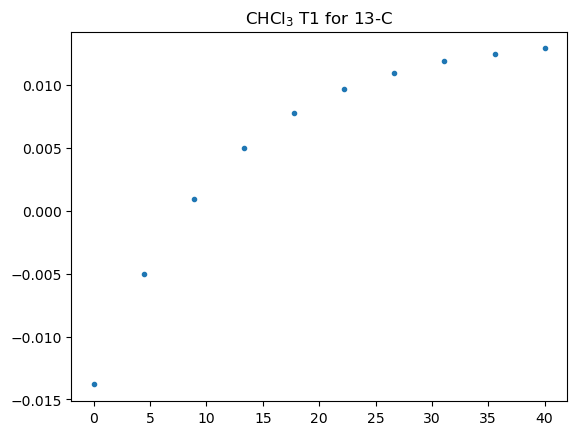

In [28]:
xs = np.array(T1_CU.iloc[:,0]) 
ys = np.array(T1_CU.iloc[:,1])


fig, ax = plt.subplots(1)
ax.plot(xs, ys, '.')
ax.set_title("CHCl$_3$ T1 for 13-C")



[ 11.66654615   0.04537843 -13.87748912  -0.03156664] [[ 2.72672401e-10  3.15561187e-07 -8.11290404e-05 -3.15561022e-07]
 [ 3.15561196e-07  1.39532611e-01 -3.58729317e+01 -1.39532610e-01]
 [-8.11290428e-05 -3.58729317e+01  9.22269874e+03  3.58729316e+01]
 [-3.15561031e-07 -1.39532610e-01  3.58729316e+01  1.39532609e-01]]


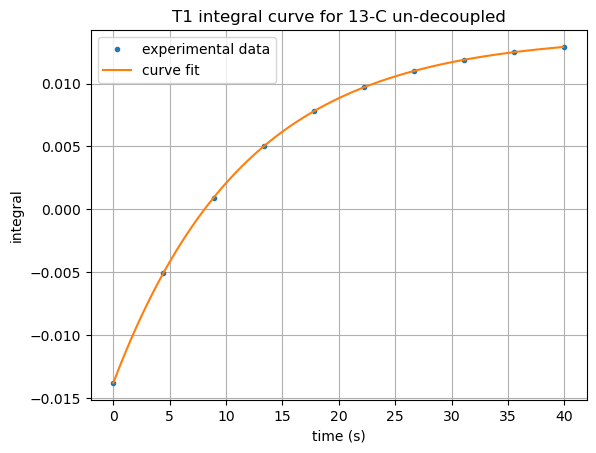

In [29]:
# perform the fit
# Your code goes here, the results should be similar to the following plot

initial_guess = [10,1,0,0]

popt, pcov = scipy.optimize.curve_fit(growExp, xs, ys, initial_guess)
print(popt, pcov)

x_val = np.arange(min(xs), max(xs), 0.1)
plt.plot(xs, ys, '.', label="experimental data")
plt.plot(x_val, growExp(x_val, *popt), label="curve fit")
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("integral")
plt.title("T1 integral curve for 13-C un-decoupled")
plt.legend()


# EXP 7

In [30]:
def hl_envelopes_idx(s, dmin=1, dmax=1, split=False):
    """
    Input :
    s: 1d-array, data signal from which to extract high and low envelopes
    dmin, dmax: int, optional, size of chunks, use this if the size of the input signal is too big
    split: bool, optional, if True, split the signal in half along its mean, might help to generate the envelope in some cases
    Output :
    lmin,lmax : high/low envelope idx of input signal s
    """

    # locals min      
    lmin = (np.diff(np.sign(np.diff(s))) > 0).nonzero()[0] + 1 
    # locals max
    lmax = (np.diff(np.sign(np.diff(s))) < 0).nonzero()[0] + 1 
    

    if split:
        # s_mid is zero if s centered around x-axis or more generally mean of signal
        s_mid = np.mean(s) 
        # pre-sorting of locals min based on relative position with respect to s_mid 
        lmin = lmin[s[lmin]<s_mid]
        # pre-sorting of local max based on relative position with respect to s_mid 
        lmax = lmax[s[lmax]>s_mid]


    # global max of dmax-chunks of locals max 
    lmin = lmin[[i+np.argmin(s[lmin[i:i+dmin]]) for i in range(0,len(lmin),dmin)]]
    # global min of dmin-chunks of locals min 
    lmax = lmax[[i+np.argmax(s[lmax[i:i+dmax]]) for i in range(0,len(lmax),dmax)]]
    
    return lmin,lmax

In [31]:
e7_fid_data = pd.read_csv("../lab_data/lab2/lab2_day4/exp4_fid.csv", header=None)

e7_fid_data



,0,1,2
0,100.000,0.591522,-0.267707
1,100.024,0.588210,-0.250907
2,100.049,0.600406,-0.181202
3,100.073,0.588990,-0.115755
4,100.098,0.567019,-0.119852
...,...,...,...
131067,3299.880,-0.000653,-0.015809
131068,3299.900,0.043304,-0.069489
131069,3299.930,0.092696,-0.111032
131070,3299.950,0.118681,-0.111236


/tmp/ipykernel_15008/1908727484.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))
/tmp/ipykernel_15008/1908727484.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

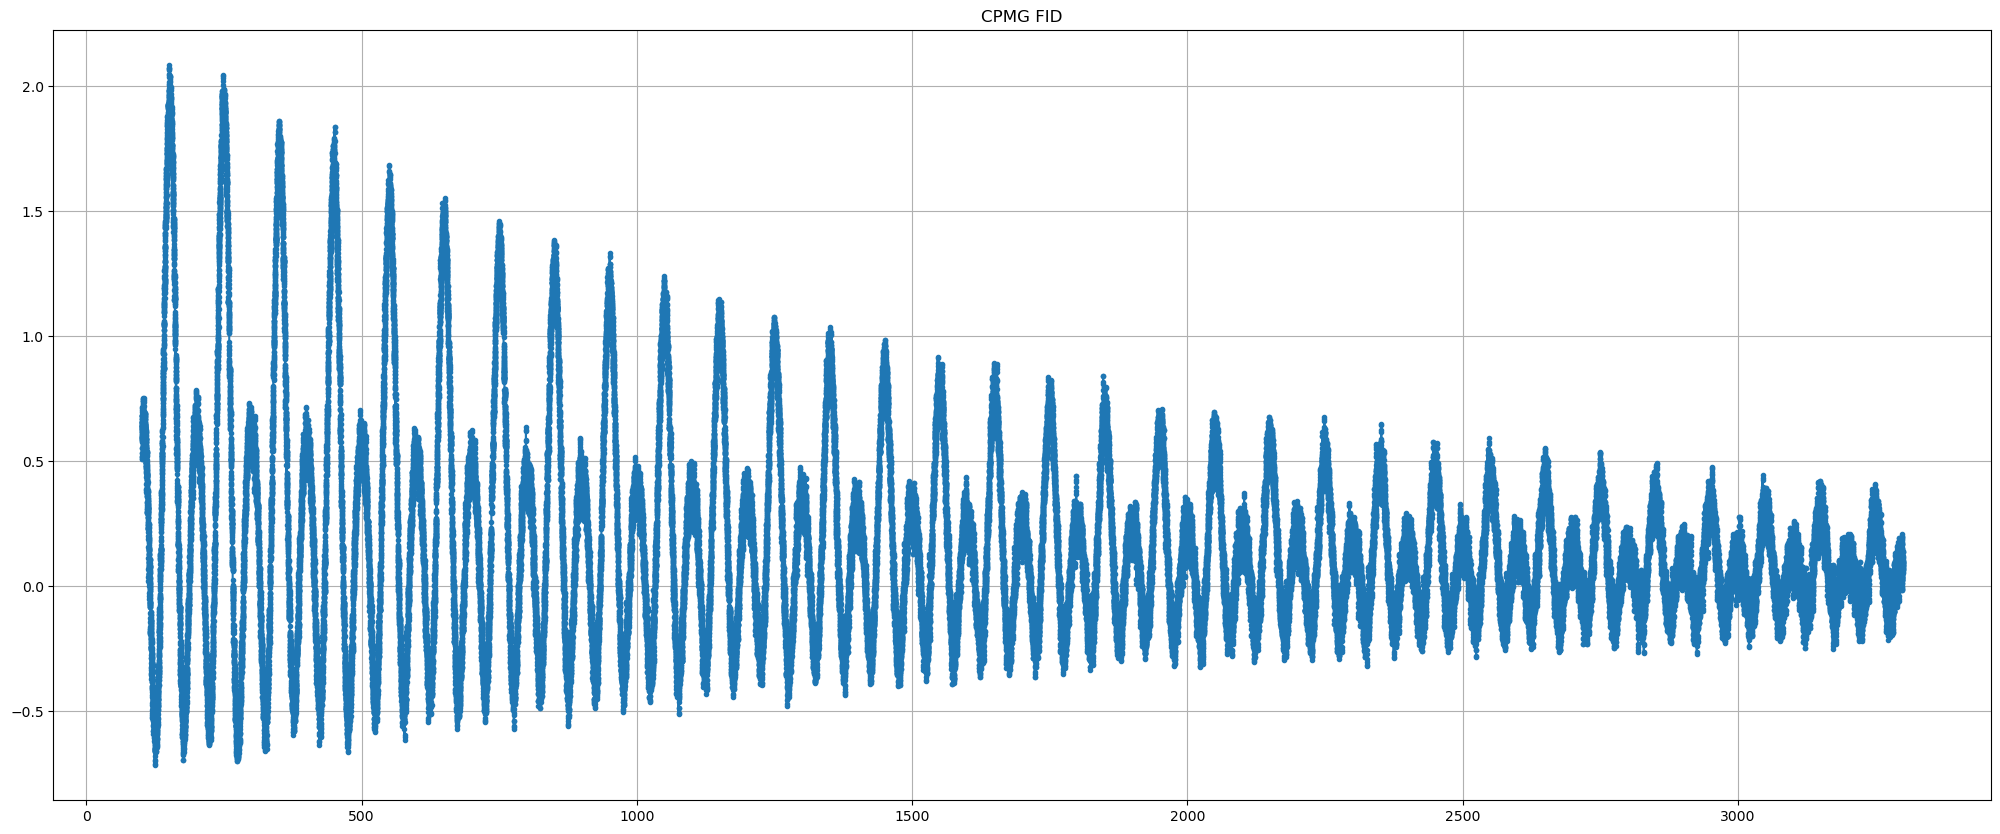

In [32]:
xs = np.array(e7_fid_data.iloc[:,0]) 
ys = np.array(e7_fid_data.iloc[:,1])

xs = xs[0:int(len(xs)/1)]
ys = ys[0:int(len(xs)/1)]

yhat = savitzky_golay(ys, 11, 3)

lmin, lmax = hl_envelopes_idx(yhat)


fig,ax = plt.subplots(1, figsize=(25,10))

ax.plot(xs, yhat, '.-')
#ax.plot(xs[lmax], yhat[lmax], '.')
ax.set_title("CPMG FID")
ax.grid()

/tmp/ipykernel_15008/2880138628.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window = np.int(np.floor(xlen/32))


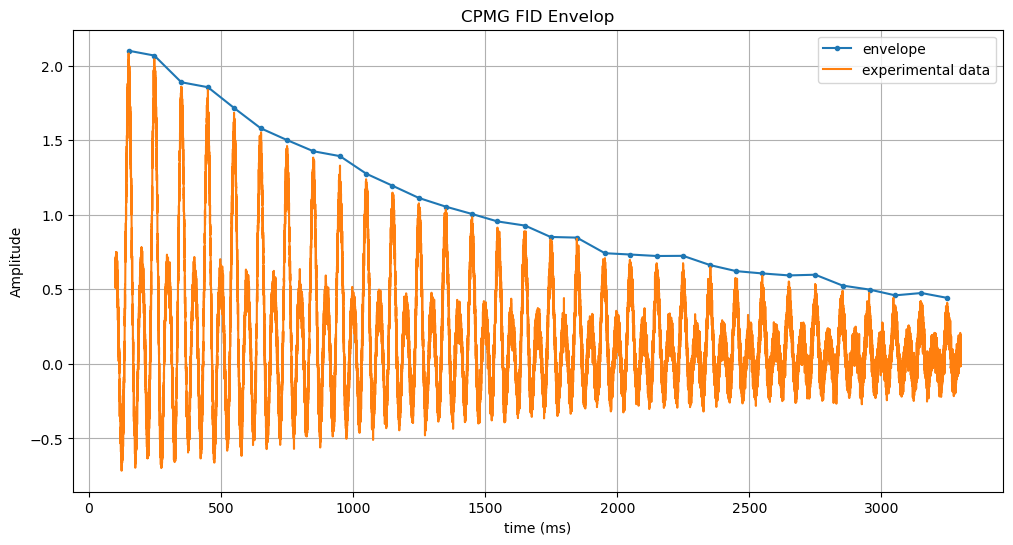

In [33]:
#generate the envelope

x_max =[]
y_max =[]
xlen = len(xs)
window = np.int(np.floor(xlen/32))
for i in range(0,32):
    ysp = ys[0 + i*window : window + i*window]
    ym = max(ysp)
    #print(ym)
    index = np.where(ysp == ym)[0][0] + i*window
    #print(index)
    y_max.append(ym)
    x_max.append(xs[index])

fig,ax = plt.subplots(1, figsize=(12,6))
ax.plot(x_max, y_max, '.-', label="envelope")
#ax.plot(xs[lmax], yhat[lmax], '.')
ax.set_title("CPMG FID Envelop")
ax.plot(xs, yhat, '-', label="experimental data")
ax.set_xlabel("time (ms)")
ax.set_ylabel("Amplitude")
ax.grid()
ax.legend()


In [34]:
# define the fitting function
def decay_exp(x, T2, m, delta, x0, c):
    return m*(np.cos(delta*(x-x0))*np.exp(-1*(x-x0)/T2)) + c

def closest_value(input_list_x, input_list_y, input_value):
 
  arr = np.asarray(input_list_y)
 
  i = (np.abs(arr - input_value)).argmin()
 
  return input_list_x[i], i

/home/amanmehta/tools/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.47522622e+03  2.07341913e+00 -1.44190271e-12  5.17237530e+01
  2.17497210e-01]
0.9645903111211797
intersection value: (1491.97, 57015)


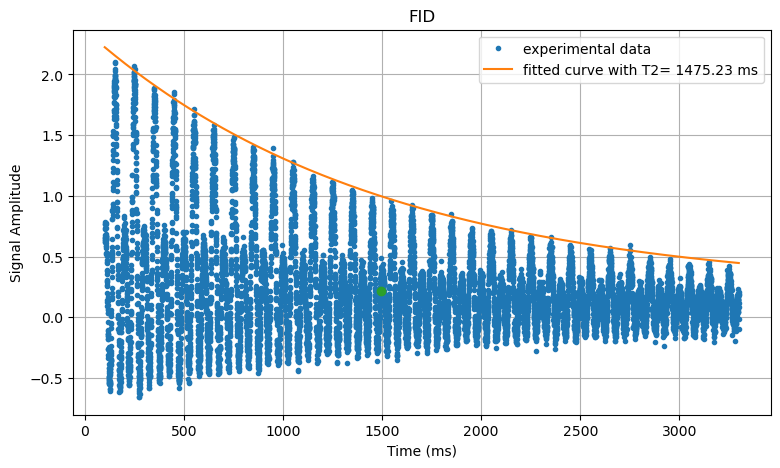

In [35]:
initial_guess = [10,2,0,0,0]

popt, pcov = scipy.optimize.curve_fit(decay_exp, x_max, y_max, initial_guess, maxfev = 50000)
print(popt)

x_val = np.arange(min(xs), max(xs), (max(xs)- min(xs))/10000)

intersection_point = closest_value(xs, ys, ys[0]/np.e)[1]

fig,ax = plt.subplots(1, figsize=(9,5))
ax.plot(xs[lmax], ys[lmax], '.', label="experimental data")
ax.plot(x_val, decay_exp(x_val, *popt), label="fitted curve with T2= " + str(np.round(popt[0],2)) + " ms")
#ax.plot(x_val, [ys[intersection_point]]*len(x_val), label="y_max/e", linestyle= '-.')
ax.plot(xs[intersection_point], ys[intersection_point], 'o' )
#ax.axvline(x = xs[intersection_point], linestyle="-.")
#ax.annotate("( "+ str(xs[intersection_point]) + ", " + str(ys[intersection_point]) + " )", (xs[intersection_point], ys[intersection_point]))

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Signal Amplitude")
ax.set_title("FID")
ax.grid()
print(2/popt[1])
ax.legend()

print("intersection value: " +str(closest_value(xs, ys, ys[0]/np.e)))


In [ ]:
##############